In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
DEVICE = torch.device("cpu")
BATCHSIZE = 64
INPUT_SIZE = 1928

In [3]:
class Model(nn.Module): 
    def __init__(self, input_size): 
        super(Model, self).__init__()
        self.l0 = nn.Linear(input_size, 45)
        self.d0 = nn.Dropout(0.33814858557939)
        self.l1 = nn.Linear(45, 45)
        self.d1 = nn.Dropout(0.41601441860582045)
        self.l2 = nn.Linear(45, 88)
        self.d2 = nn.Dropout(0.32315395376219097)
        self.final = nn.Linear(88, 2)

        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid() 
        self.lsmax = nn.LogSoftmax(dim=1)

    def forward(self, x): 
        x = self.d0(self.tanh(self.l0(x)))
        x = self.d1(self.sigmoid(self.l1(x)))
        x = self.d2(self.tanh(self.l2(x)))
        x = self.lsmax(self.final(x))
        return x

In [4]:
model = Model(INPUT_SIZE)
model.load_state_dict(torch.load("model.pth", weights_only=True))
model.eval()

Model(
  (l0): Linear(in_features=1928, out_features=45, bias=True)
  (d0): Dropout(p=0.33814858557939, inplace=False)
  (l1): Linear(in_features=45, out_features=45, bias=True)
  (d1): Dropout(p=0.41601441860582045, inplace=False)
  (l2): Linear(in_features=45, out_features=88, bias=True)
  (d2): Dropout(p=0.32315395376219097, inplace=False)
  (final): Linear(in_features=88, out_features=2, bias=True)
  (tanh): Tanh()
  (sigmoid): Sigmoid()
  (lsmax): LogSoftmax(dim=1)
)

In [5]:
train_data = pd.read_csv("train_fe.csv")

In [6]:
train_x = train_data.drop(["target", "fold"], axis=1).to_numpy(dtype=np.float32)
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
train_x = torch.tensor(train_x, device=DEVICE)
train_y = train_data.target.to_numpy()

In [7]:
pred = model(train_x).argmax(dim=1, keepdim=True).numpy().flatten()

# Misclassified samples 
wrong_idx = np.where(pred != train_y)[0]

# Correctly classified samples
correct_idx = np.where(pred == train_y)[0]

In [8]:
wrong_data = train_data.iloc[wrong_idx]
correct_data = train_data.iloc[correct_idx]

In [9]:
wrong_data.describe()

,bid_price1_a_t=0,ask_price1_a_t=0,bid_price2_a_t=0,ask_price2_a_t=0,bid_size1_a_t=0,ask_size1_a_t=0,bid_size2_a_t=0,ask_size2_a_t=0,bid_price1_b_t=0,ask_price1_b_t=0,...,target,fold,a_high,b_high,a_low,b_low,a_log_ret,b_log_ret,a_volatility,b_volatility
count,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,...,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000
mean,0.998984,0.999688,0.998841,0.999878,104.877024,95.008198,54.942816,55.395778,1.000511,1.001172,...,0.578192,1.997540,1.000975,1.001861,0.998029,0.999953,-0.000450,0.000132,0.001369,0.000165
std,0.002159,0.002270,0.002145,0.002293,80.847332,72.182797,63.831264,68.186406,0.003143,0.003217,...,0.493899,1.399641,0.002722,0.003467,0.001788,0.003219,0.002327,0.001420,0.001550,0.000192
min,0.961964,0.965063,0.961528,0.965111,1.000000,1.000000,1.000000,1.000000,0.979425,0.987939,...,0.000000,0.000000,0.998515,0.989427,0.952696,0.979527,-0.034283,-0.010348,0.000047,0.000013
25%,0.998275,0.998754,0.998179,0.998946,92.000000,90.000000,26.000000,28.000000,0.999040,0.999624,...,0.000000,1.000000,0.999583,1.000094,0.998515,0.998484,-0.001253,-0.000575,0.000606,0.000084
50%,0.998275,0.998754,0.998179,0.998946,92.000000,90.000000,26.000000,28.000000,1.000140,1.000694,...,1.000000,2.000000,1.000470,1.001245,0.998515,0.999768,0.000000,0.000091,0.001016,0.000121
75%,0.999732,1.000423,0.999600,1.000582,100.000000,100.000000,100.000000,92.000000,1.001453,1.002072,...,1.000000,3.000000,1.001572,1.002841,0.998515,1.001076,0.000000,0.000791,0.001616,0.000182
max,1.031811,1.034869,1.031152,1.035469,812.000000,797.000000,604.000000,1240.000000,1.040485,1.041012,...,1.000000,4.000000,1.049868,1.045651,0.998515,1.040749,0.035682,0.011373,0.026422,0.004384


In [10]:
correct_data.describe()

,bid_price1_a_t=0,ask_price1_a_t=0,bid_price2_a_t=0,ask_price2_a_t=0,bid_size1_a_t=0,ask_size1_a_t=0,bid_size2_a_t=0,ask_size2_a_t=0,bid_price1_b_t=0,ask_price1_b_t=0,...,target,fold,a_high,b_high,a_low,b_low,a_log_ret,b_log_ret,a_volatility,b_volatility
count,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,...,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000
mean,0.998898,0.999735,0.998738,0.999944,105.721026,95.721916,58.338945,56.926513,0.999334,1.000083,...,0.318712,1.999757,1.001049,1.000811,0.997757,0.998517,-0.000218,-0.000060,0.001513,0.000194
std,0.002664,0.002818,0.002675,0.002895,84.501094,75.245580,71.332674,70.087760,0.004211,0.004220,...,0.465996,1.420182,0.003008,0.004497,0.002520,0.004506,0.002929,0.001887,0.001844,0.000246
min,0.944396,0.954734,0.944337,0.954794,1.000000,1.000000,1.000000,1.000000,0.939942,0.942764,...,0.000000,0.000000,0.998515,0.943117,0.941349,0.937825,-0.044805,-0.025503,0.000032,0.000009
25%,0.998275,0.998754,0.998179,0.998946,92.000000,90.000000,26.000000,28.000000,0.997907,0.998555,...,0.000000,1.000000,0.999409,0.999012,0.998226,0.997020,-0.001114,-0.000843,0.000615,0.000093
50%,0.998275,0.998754,0.998179,0.998946,92.000000,90.000000,26.000000,28.000000,0.999569,1.000129,...,0.000000,2.000000,1.000445,1.000589,0.998515,0.998958,0.000000,-0.000045,0.001056,0.000134
75%,0.999724,1.000450,0.999562,1.000607,100.000000,100.000000,100.000000,100.000000,1.000923,1.001556,...,1.000000,3.000000,1.001696,1.002264,0.998515,1.000444,0.000242,0.000732,0.001740,0.000210
max,1.040286,1.048256,1.040098,1.053213,1401.000000,1100.000000,1000.000000,1457.000000,1.043332,1.045335,...,1.000000,4.000000,1.049564,1.050529,0.998515,1.038535,0.050265,0.026844,0.036102,0.007578


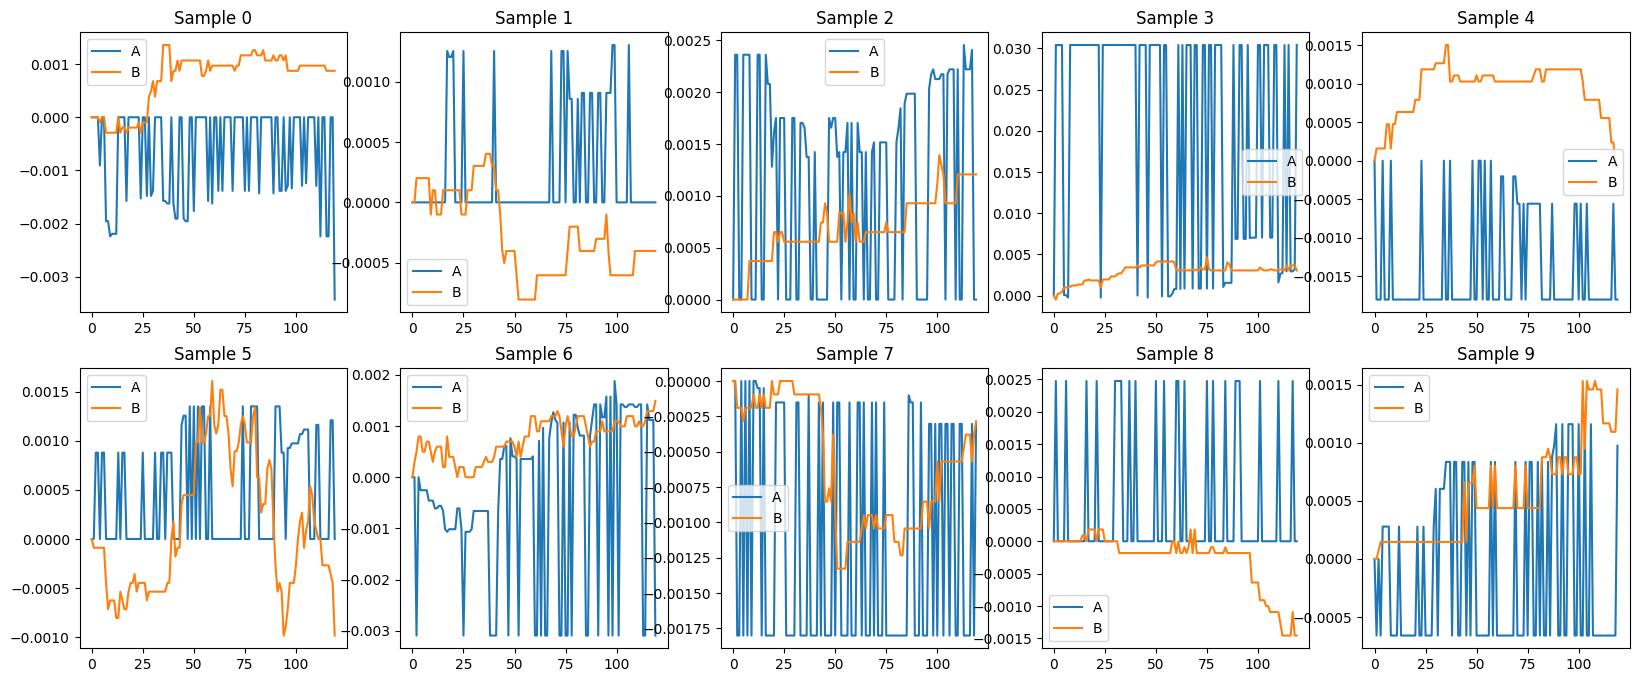

In [11]:
# Randomly sample 10 misclassified samples
wrong_sample = wrong_data.sample(10)
wrong_sample = wrong_sample.reset_index(drop=True)

# Plot the misclassified samples
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i, row in wrong_sample.iterrows():
    # Track % change in bid price
    a_prices = []
    b_prices = []
    for j in range(0, 120):
        a_prices.append((row[f"bid_price1_a_t={j}"] - row[f"bid_price1_a_t={0}"]) / row[f"bid_price1_a_t={0}"])
        b_prices.append((row[f"bid_price1_b_t={j}"] - row[f"bid_price1_b_t={0}"]) / row[f"bid_price1_b_t={0}"])

    ax[i // 5, i % 5].plot(a_prices, label="A")
    ax[i // 5, i % 5].plot(b_prices, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()


In [12]:
wrong_sample

,bid_price1_a_t=0,ask_price1_a_t=0,bid_price2_a_t=0,ask_price2_a_t=0,bid_size1_a_t=0,ask_size1_a_t=0,bid_size2_a_t=0,ask_size2_a_t=0,bid_price1_b_t=0,ask_price1_b_t=0,...,target,fold,a_high,b_high,a_low,b_low,a_log_ret,b_log_ret,a_volatility,b_volatility
0,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.994934,0.995513,...,1.0,0,0.998515,0.996767,0.995851,0.994982,-0.002671,0.001260,0.000786,0.000146
1,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.998742,0.999044,...,1.0,4,0.999950,0.999245,0.998515,0.998088,0.000000,-0.000353,0.000556,0.000089
2,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,1.003028,1.003401,...,0.0,3,1.000985,1.004566,0.998515,1.003168,0.000000,0.001160,0.001108,0.000097
3,0.968815,0.974559,0.968574,0.975428,26.0,58.0,300.0,400.0,1.005887,1.011896,...,0.0,4,0.998515,1.012693,0.971566,1.008646,0.027235,0.001458,0.015367,0.000707
4,1.000076,1.000685,0.999772,1.000837,200.0,103.0,27.0,302.0,1.000830,1.001304,...,1.0,3,1.000380,1.002529,0.998515,1.001067,-0.001867,0.000118,0.000897,0.000100
5,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.998349,0.998884,...,1.0,3,1.000376,1.000223,0.998515,0.997590,0.000000,-0.000894,0.000983,0.000213
6,1.001374,1.001628,1.001119,1.002239,1.0,90.0,3.0,101.0,1.001294,1.001792,...,0.0,2,1.003460,1.003036,0.998515,1.001493,-0.002986,0.001490,0.002150,0.000143
7,1.000076,1.000682,1.000025,1.001086,90.0,122.0,200.0,50.0,1.001282,1.001662,...,1.0,2,1.000379,1.001472,0.998515,1.000095,-0.000455,-0.000332,0.001118,0.000103
8,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,1.002327,1.002783,...,0.0,2,1.001012,1.002692,0.998515,1.001049,0.000000,-0.001503,0.001340,0.000090
9,0.998934,0.999444,0.998888,0.999722,179.0,100.0,29.0,101.0,0.999308,1.000474,...,1.0,3,1.000579,1.001312,0.998515,0.999891,0.001275,0.001165,0.001027,0.000123


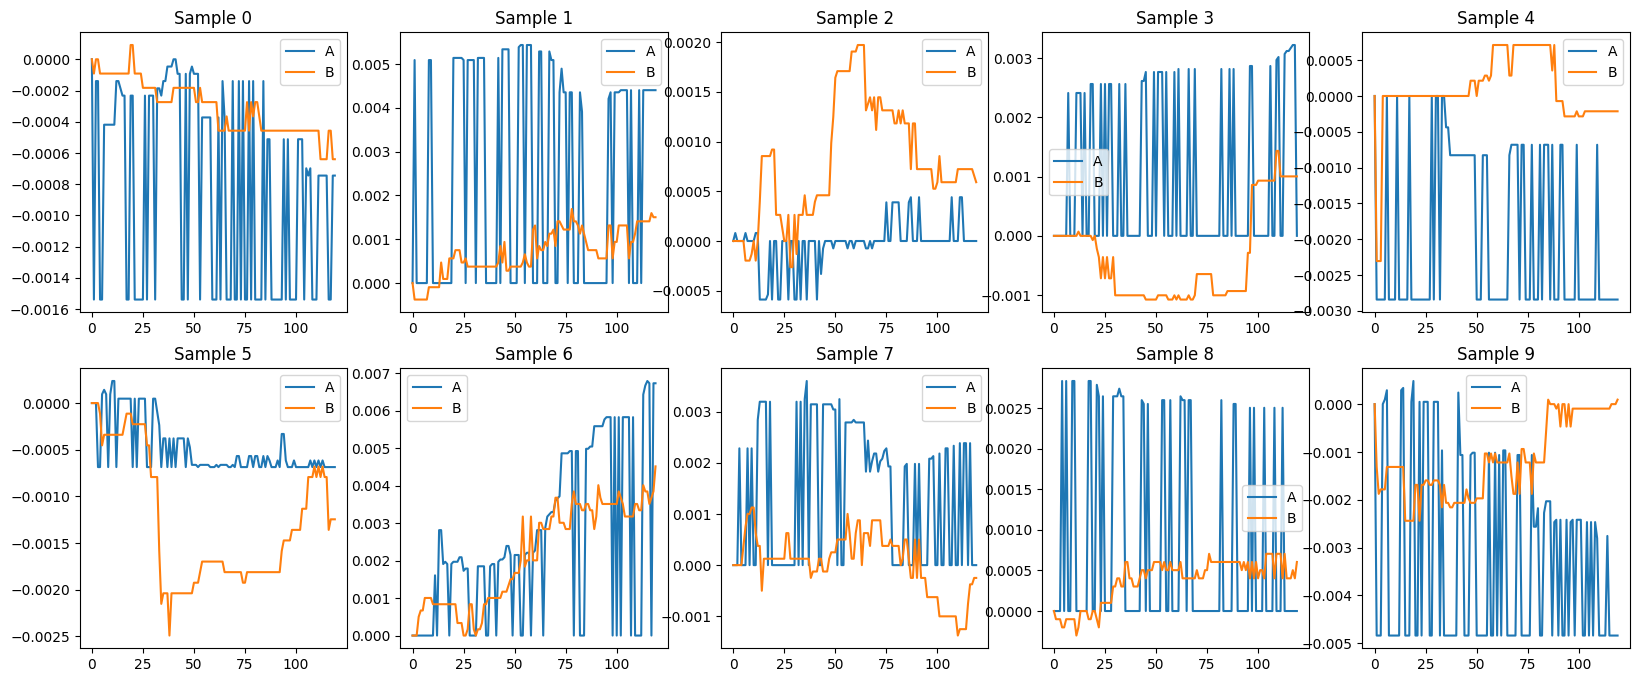

In [13]:
# Randomly sample 10 correctly classified samples
correct_sample = correct_data.sample(10)
correct_sample = correct_sample.reset_index(drop=True)

# Plot the correctly classified samples
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i, row in correct_sample.iterrows():
    # Track % change in bid price
    a_prices = []
    b_prices = []
    for j in range(0, 120):
        a_prices.append((row[f"bid_price1_a_t={j}"] - row[f"bid_price1_a_t={0}"]) / row[f"bid_price1_a_t={0}"])
        b_prices.append((row[f"bid_price1_b_t={j}"] - row[f"bid_price1_b_t={0}"]) / row[f"bid_price1_b_t={0}"])

    ax[i // 5, i % 5].plot(a_prices, label="A")
    ax[i // 5, i % 5].plot(b_prices, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()

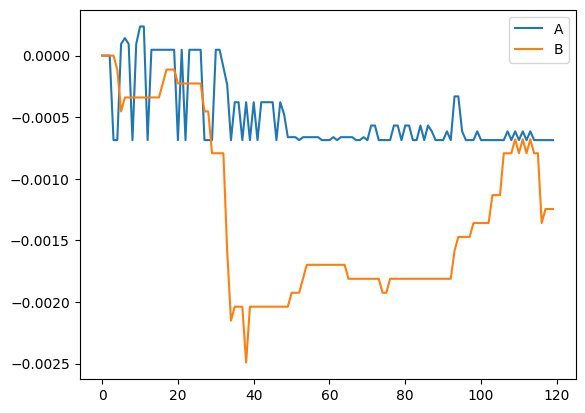

In [19]:
# Plot sample 5 from the correctly classified samples
sample = correct_sample.iloc[5]
a_prices = []
b_prices = []
for j in range(0, 120):
    a_prices.append((sample[f"bid_price1_a_t={j}"] - sample[f"bid_price1_a_t={0}"]) / sample[f"bid_price1_a_t={0}"])
    b_prices.append((sample[f"bid_price1_b_t={j}"] - sample[f"bid_price1_b_t={0}"]) / sample[f"bid_price1_b_t={0}"])

plt.plot(a_prices, label="A")
plt.plot(b_prices, label="B")
plt.legend()
plt.show()

In [14]:
correct_sample

,bid_price1_a_t=0,ask_price1_a_t=0,bid_price2_a_t=0,ask_price2_a_t=0,bid_size1_a_t=0,ask_size1_a_t=0,bid_size2_a_t=0,ask_size2_a_t=0,bid_price1_b_t=0,ask_price1_b_t=0,...,target,fold,a_high,b_high,a_low,b_low,a_log_ret,b_log_ret,a_volatility,b_volatility
0,0.999814,1.000046,0.999674,1.000466,108.0,100.0,92.0,24.0,0.997992,0.998357,...,0.0,1,1.000116,0.998175,0.998515,0.997399,-0.000792,-0.000686,0.000738,0.000069
1,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,1.004816,1.005949,...,1.0,3,1.004240,1.006988,0.998515,1.004863,0.004447,0.001549,0.002942,0.000207
2,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.995680,0.996858,...,0.0,2,0.999460,0.997971,0.998176,0.995779,0.000000,0.000558,0.000301,0.000183
3,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.999892,1.000609,...,0.0,1,1.001971,1.001684,0.998515,0.998961,0.000000,0.001110,0.001786,0.000168
4,1.001120,1.001753,1.000925,1.002142,340.0,9.0,26.0,48.0,1.000463,1.001744,...,1.0,2,1.001436,1.001388,0.998515,0.998337,-0.002921,-0.000285,0.001326,0.000368
5,0.998961,0.999339,0.998913,0.999433,1.0,32.0,1.0,100.0,1.001077,1.001870,...,1.0,3,0.999409,1.001474,0.998512,0.999263,-0.000635,-0.001416,0.000255,0.000133
6,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,1.007411,1.008085,...,1.0,2,1.005809,1.012380,0.998515,1.007664,0.007249,0.004586,0.002701,0.000295
7,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,1.000063,1.000438,...,0.0,1,1.002023,1.001441,0.998515,0.998998,0.000000,-0.000251,0.001715,0.000254
8,0.998275,0.998754,0.998179,0.998946,92.0,90.0,26.0,28.0,0.997287,0.997488,...,0.0,2,1.001435,0.998141,0.998515,0.997136,0.000000,0.000604,0.001471,0.000102
9,1.003128,1.006427,1.003080,1.006524,286.0,84.0,196.0,25.0,0.995936,0.996964,...,0.0,2,1.005020,0.996450,0.998515,0.994208,-0.006252,-0.000047,0.003117,0.000237


In [15]:
abs(wrong_data["a_log_ret"] - wrong_data["b_log_ret"]).mean()

np.float64(0.0016591526284677684)

In [16]:
abs(correct_data["a_log_ret"] - correct_data["b_log_ret"]).mean()

np.float64(0.0020483449406901023)

In [ ]:
"""
Summary of price observations: 
- Correctly classified samples have a greater average absolute difference between the log returns of A and B
- Correctly classified points are more likely to have A's log returns be equal to 0 
"""

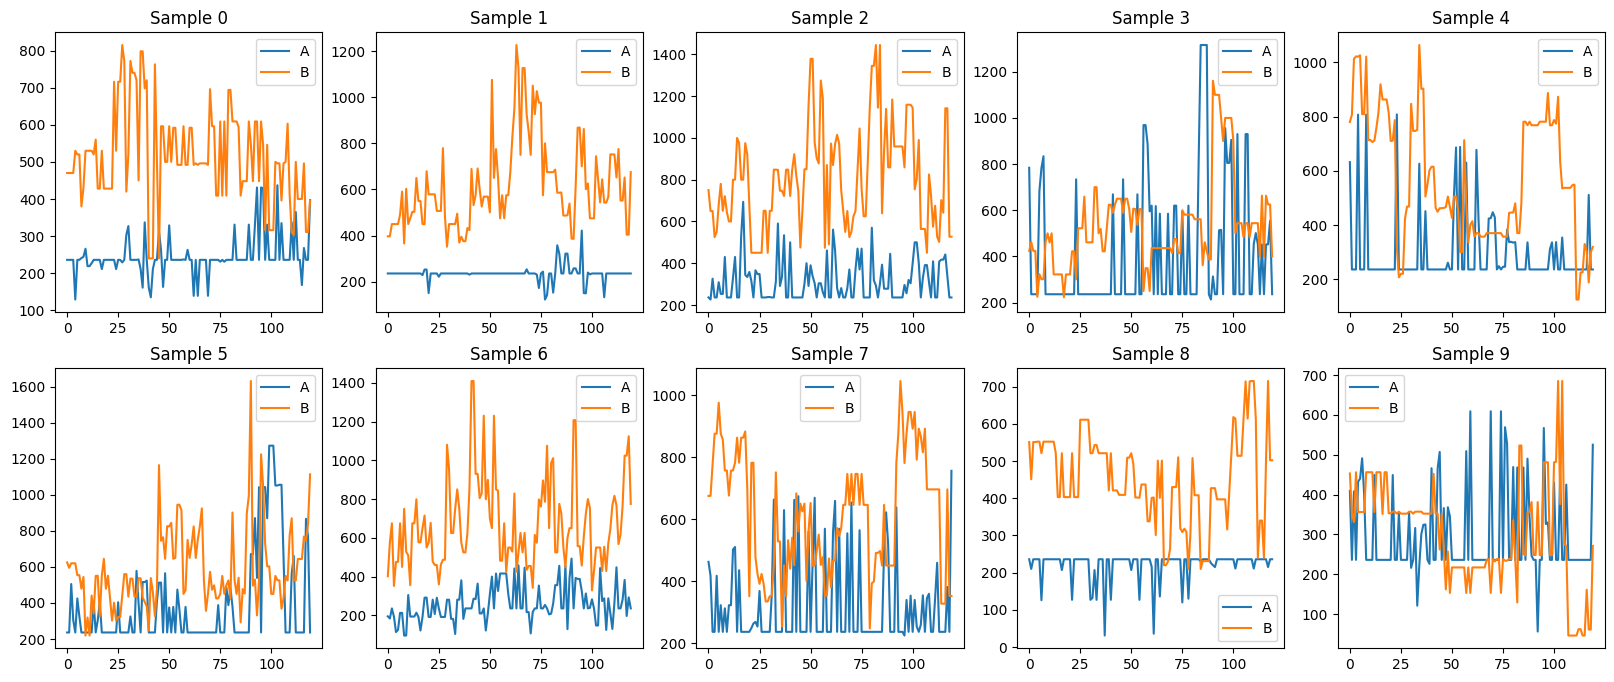

In [21]:
# Plot the total open interest for the misclassified samples
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i, row in wrong_sample.iterrows():

    a_oi = [row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"] + row[f"ask_size1_a_t={j}"] + row[f"ask_size2_a_t={j}"] for j in range(120)]
    b_oi = [row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"] + row[f"ask_size1_b_t={j}"] + row[f"ask_size2_b_t={j}"] for j in range(120)] 

    ax[i // 5, i % 5].plot(a_oi, label="A")
    ax[i // 5, i % 5].plot(b_oi, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()

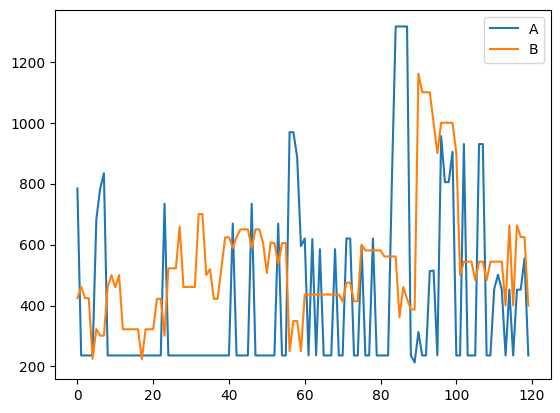

In [23]:
# Plot the total open interest for sample 3 from the misclassified samples
sample = wrong_sample.iloc[3]
a_oi = [sample[f"bid_size1_a_t={j}"] + sample[f"bid_size2_a_t={j}"] + sample[f"ask_size1_a_t={j}"] + sample[f"ask_size2_a_t={j}"] for j in range(120)]
b_oi = [sample[f"bid_size1_b_t={j}"] + sample[f"bid_size2_b_t={j}"] + sample[f"ask_size1_b_t={j}"] + sample[f"ask_size2_b_t={j}"] for j in range(120)]

plt.plot(a_oi, label="A")
plt.plot(b_oi, label="B")
plt.legend()
plt.show()

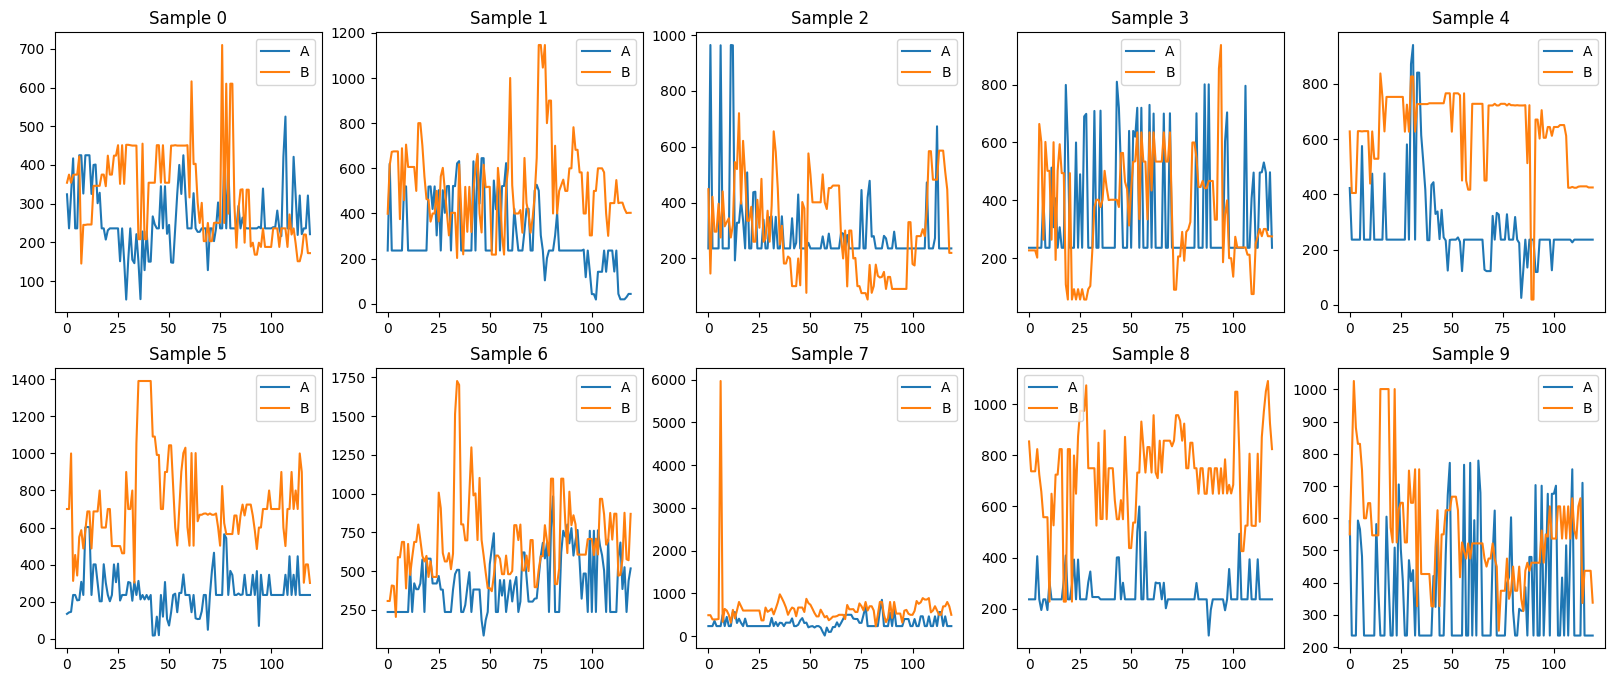

In [22]:
# Plot the total open interest for the correctly classified samples

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i, row in correct_sample.iterrows():

    a_oi = [row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"] + row[f"ask_size1_a_t={j}"] + row[f"ask_size2_a_t={j}"] for j in range(120)]
    b_oi = [row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"] + row[f"ask_size1_b_t={j}"] + row[f"ask_size2_b_t={j}"] for j in range(120)] 

    ax[i // 5, i % 5].plot(a_oi, label="A")
    ax[i // 5, i % 5].plot(b_oi, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()

In [97]:
"""
Summary of volume observations:
- Misclassified samples have less total open interest than correctly classified samples
- Misclassified samples have greater variation in B's total open interest
- Misclassified samples have more similar total open interest between A and B
"""

"\nSummary of volume observations:\n- Misclassified samples have less total open interest than correctly classified samples\n- Misclassified samples have greater variation in B's total open interest\n- Misclassified samples have more similar total open interest between A and B\n"

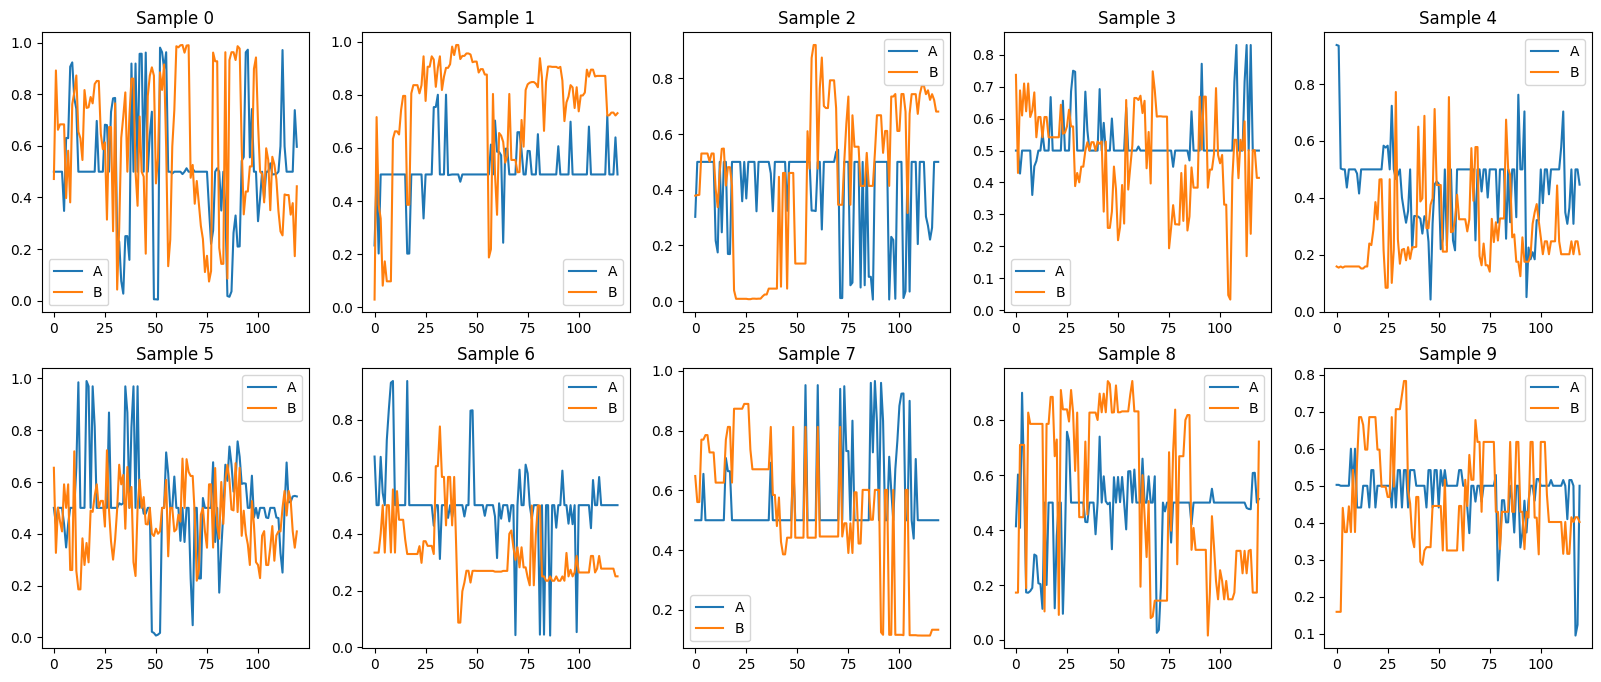

In [98]:
# Plot orderbook imbalance for misclassified samples
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i, row in wrong_sample.iterrows():
    a_imb = [(row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"]) / (row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"] + row[f"ask_size1_a_t={j}"] + row[f"ask_size2_a_t={j}"]) for j in range(120)]
    b_imb = [(row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"]) / (row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"] + row[f"ask_size1_b_t={j}"] + row[f"ask_size2_b_t={j}"]) for j in range(120)]

    ax[i // 5, i % 5].plot(a_imb, label="A")
    ax[i // 5, i % 5].plot(b_imb, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()

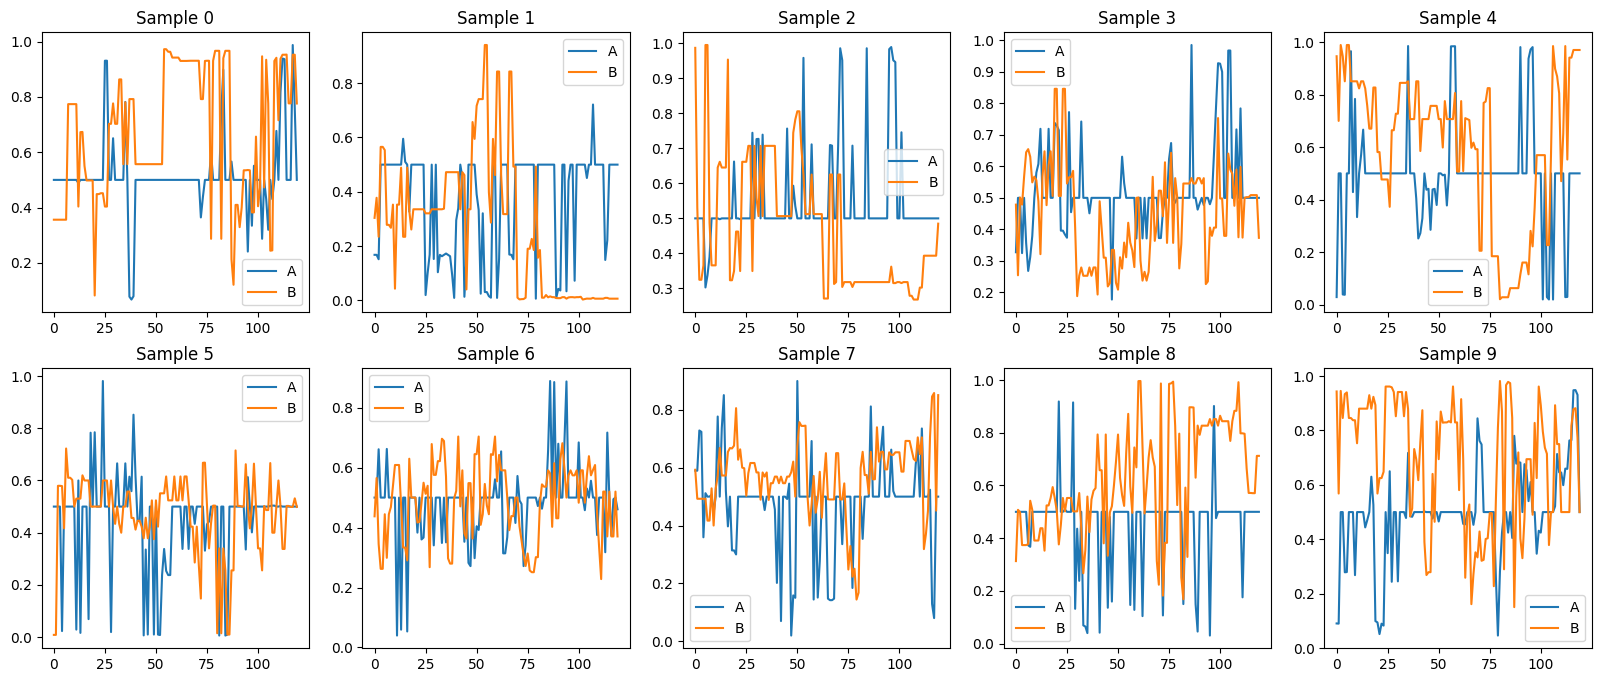

In [99]:
# Plot orderbook imbalance for correctly classified samples
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i, row in correct_sample.iterrows():
    a_imb = [(row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"]) / (row[f"bid_size1_a_t={j}"] + row[f"bid_size2_a_t={j}"] + row[f"ask_size1_a_t={j}"] + row[f"ask_size2_a_t={j}"]) for j in range(120)]
    b_imb = [(row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"]) / (row[f"bid_size1_b_t={j}"] + row[f"bid_size2_b_t={j}"] + row[f"ask_size1_b_t={j}"] + row[f"ask_size2_b_t={j}"]) for j in range(120)]

    ax[i // 5, i % 5].plot(a_imb, label="A")
    ax[i // 5, i % 5].plot(b_imb, label="B")
    ax[i // 5, i % 5].set_title(f"Sample {i}")
    ax[i // 5, i % 5].legend()

plt.show()